In [6]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy 
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

#Hierarchical Clustering

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_pca_kmeans= pd.read_csv('/content/drive/MyDrive/Capstone/Data/df_pca_kmeans.csv')
df_pca_kmeans.drop(columns=['Unnamed: 0'], inplace=True) # drop index col

X_pca= pd.read_csv('/content/drive/MyDrive/Capstone/Data/X_pca.csv')
X_pca.drop(columns=['Unnamed: 0'], inplace=True) # drop index col

Because our datset is too large, we are going to use 15% of the dataset.

In [9]:
#create a dataframe for hierarchical clustering with only 15% of dataset
df_pca_kmeans_head=df_pca_kmeans.head(20225)
hierarchical_data=df_pca_kmeans_head.iloc[:,:-16]

In [10]:
#Create dendogram of original data to get an idea of number of clusters in data
model = scipy.cluster.hierarchy.linkage(hierarchical_data, method='ward')

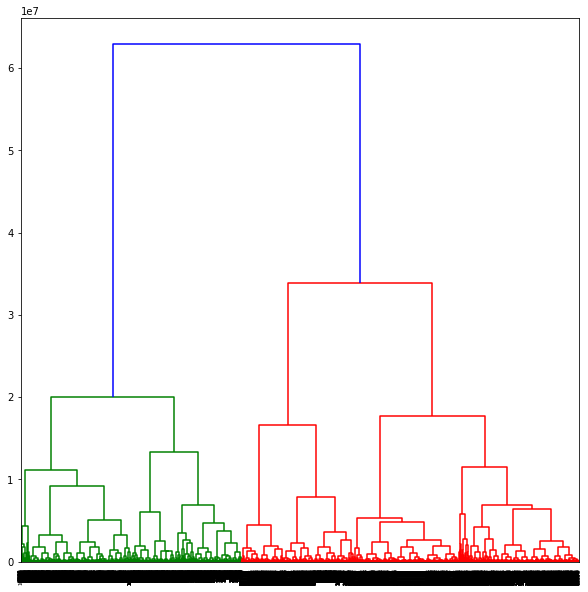

In [11]:
fig=plt.figure(figsize=(10,10))
scipy.cluster.hierarchy.dendrogram(model)
plt.show()

Silhouette Score for k = 3: 0.48900303102880055
Davies Bouldin Score for k = 3: 0.778734264458976


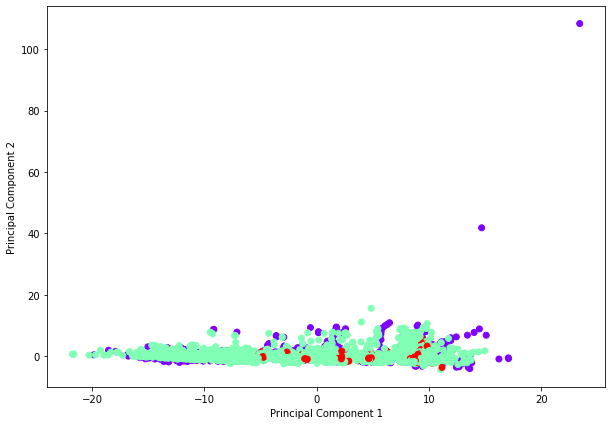

In [12]:
#Do agglomerative clustering specifically for k=3 and evaluate its silhoutte socre and Davies Bouldin Score
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')  
assigning_clusters = cluster.fit_predict(hierarchical_data)
result = cluster.labels_
plt.figure(figsize=(10, 7))  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(df_pca_kmeans_head['component 1'], df_pca_kmeans_head['component 2'], c=result, cmap='rainbow') 
print("Silhouette Score for k = 3: " + str(silhouette_score(hierarchical_data, assigning_clusters)))
print("Davies Bouldin Score for k = 3: " + str(davies_bouldin_score(hierarchical_data, assigning_clusters))) 

In [13]:
#add a column with the hierarchical labels
df_pca_kmeans_head['hier_Label'] = result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Silhouette Score for num= 2 0.4550624641982405
Davies Bouldin Score for num = 2 0.8354024491294978
Silhouette Score for num= 3 0.48900303102880055
Davies Bouldin Score for num = 3 0.778734264458976
Silhouette Score for num= 4 0.41198196302493834
Davies Bouldin Score for num = 4 1.0091033353683931
Silhouette Score for num= 5 0.3697122953641893
Davies Bouldin Score for num = 5 1.0052029978013455
Silhouette Score for num= 6 0.38391625425956666
Davies Bouldin Score for num = 6 0.9177210743696387
Silhouette Score for num= 7 0.3930042203361944
Davies Bouldin Score for num = 7 0.8423100327546394
Silhouette Score for num= 8 0.40608764430979444
Davies Bouldin Score for num = 8 0.830801092833372
Silhouette Score for num= 9 0.4199714475672156
Davies Bouldin Score for num = 9 0.8144232995215613


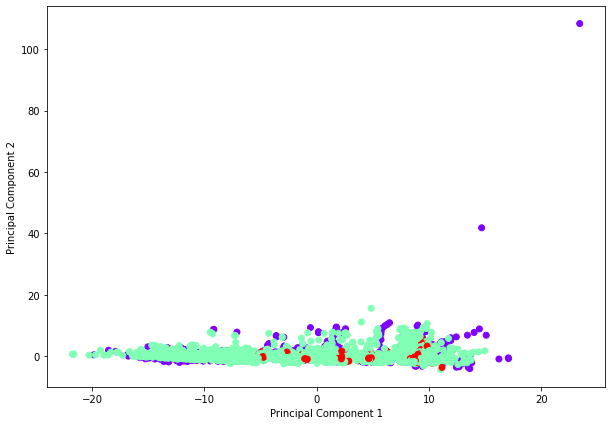

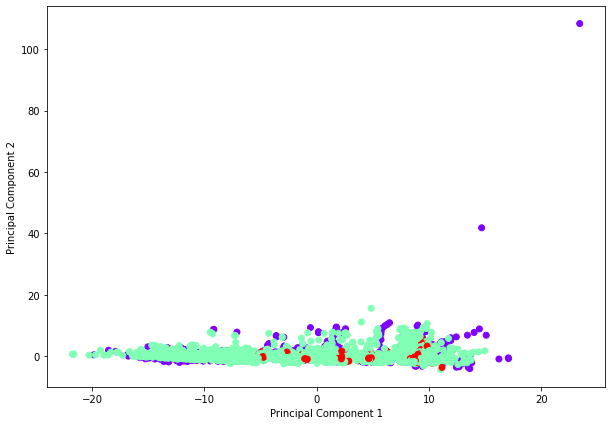

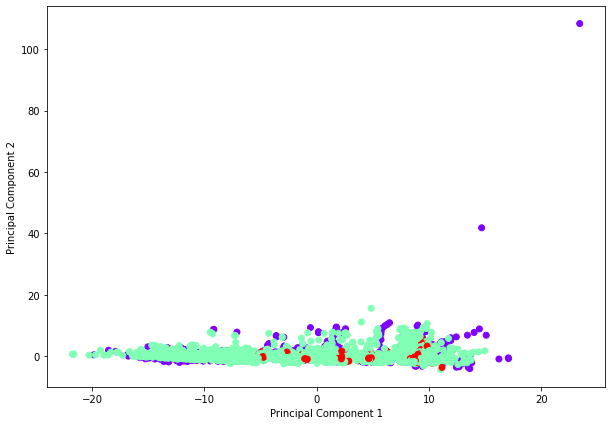

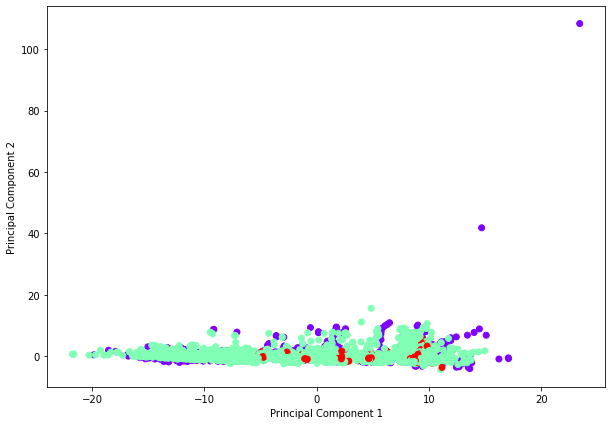

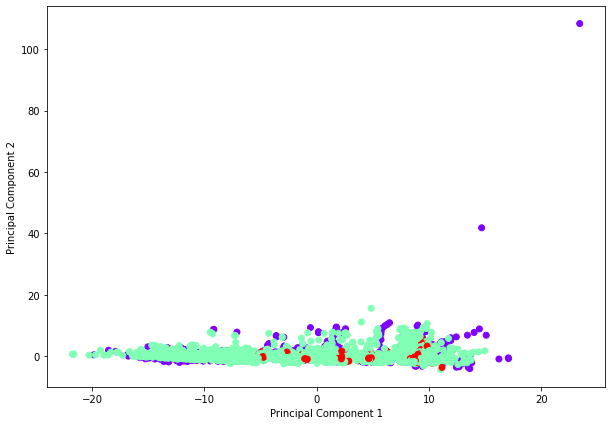

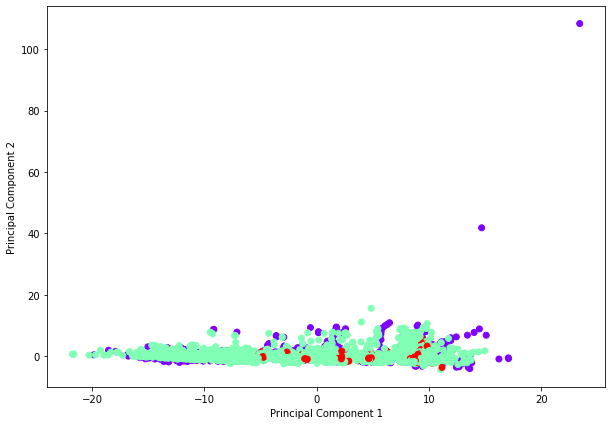

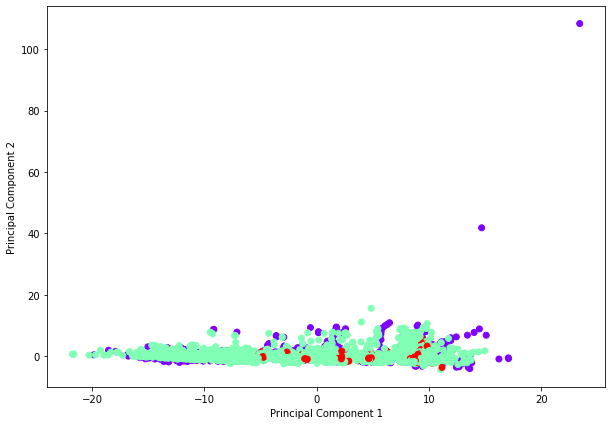

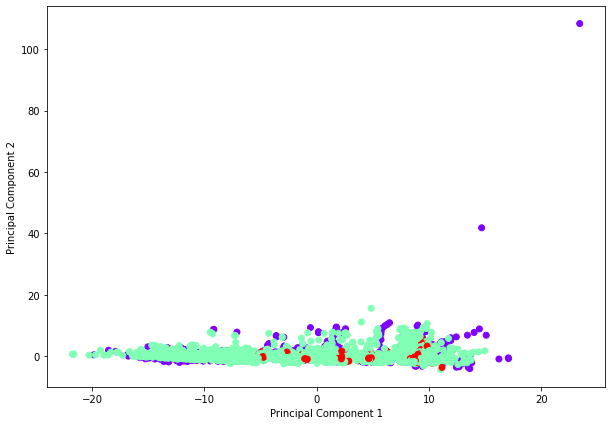

In [14]:
#compare hierarchical clustering for clusters for 2 to 9
#create 2d scatterplots for visualization and generate silhouette scorea and davies-bouldin score for each model
for num in range(2,10):
  cluster = AgglomerativeClustering(n_clusters=num,affinity='euclidean', linkage='ward')  
  assigning_clusters = cluster.fit_predict(hierarchical_data)
  plt.figure(figsize=(10, 7))  
  plt.scatter(df_pca_kmeans_head['component 1'], df_pca_kmeans_head['component 2'], c=result, cmap='rainbow') 
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  print("Silhouette Score for num= " + str(num) + " " + str(silhouette_score(hierarchical_data, assigning_clusters)))
  print("Davies Bouldin Score for num = " + str(num) + " " + str(davies_bouldin_score(hierarchical_data, assigning_clusters))) 

#DBSCAN

In [15]:
#filter a fraction of dataset`15% and create a dataframe for DBSCAN clustering
X_pca_head=X_pca.head(int(len(X_pca)*0.15))

In [20]:
X_pca_head

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,8.348151,-1.674090,-1.029281,-1.308721,0.502237,-0.093502,0.029738,-1.376931,3.254344,2.477234,-5.694125,-0.302896,0.519873,-0.051173,-0.478945
1,8.364035,-1.755379,-1.093975,-1.355537,0.514660,-0.094848,0.064825,-1.404503,3.296687,2.526123,-5.680104,-0.196813,0.490575,-0.156267,-0.491583
2,-12.195889,1.675578,6.921198,1.880674,-1.028151,3.140472,-3.426180,2.722543,-2.719857,-7.398258,-5.374945,-3.840708,-3.492226,-1.897208,-3.155459
3,-10.636768,-0.970860,-0.398204,-1.200177,0.527031,0.154480,-0.419501,-0.314717,1.100902,1.175308,0.502672,0.677431,1.113525,-1.694145,-1.153905
4,8.179499,-1.573322,-0.576825,-1.188922,0.304324,0.034002,-0.041015,-1.187231,2.803534,1.885332,-6.060362,-1.567569,-0.101954,1.748757,-0.185931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20219,-11.180382,0.142805,-7.892339,2.779281,1.710231,-1.459049,2.243942,1.909167,0.452883,-1.200244,-1.355063,4.501822,-0.429442,-0.247322,0.758916
20220,8.659893,-1.266561,-0.645110,-1.588004,0.313432,-0.009787,-0.142427,-1.592631,4.566344,3.168468,-9.861768,-2.242064,0.258980,2.698061,-0.973083
20221,8.664038,-1.335203,-1.628205,-1.454293,0.462543,-0.163636,0.044642,-1.537628,5.079387,3.617163,-9.609913,-0.598757,0.784311,0.921581,-1.075619
20222,8.471027,-1.843502,-1.450171,-0.281127,0.512206,-0.222725,0.454348,-0.484594,-0.487352,0.656721,1.163689,0.991151,-1.535775,-1.484763,0.391052


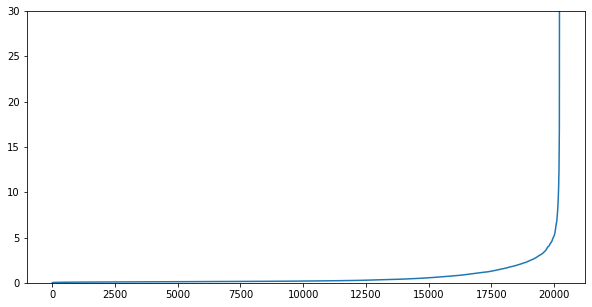

In [16]:
#create visualization to find optimal epsilon level 
plt.figure(figsize=(10,5))
nn = NearestNeighbors(n_neighbors=5).fit(X_pca_head)
distances, idx = nn.kneighbors(X_pca_head)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim([0, 30])
plt.show()

In [17]:
#Try DBSCAN clustering with epsilons between 2.5-5 and minimum samples as 30, plot, and generate scores
#create visualizations for clusters and generate silhouette score and davies bouldin indices
Silhouette =[]
davies_bouldin=[]

Silhouette Score for eps = 2.5 0.32754387799690704
Davies Bouldin Score for eps = 2.5 1.6203129733504809
Silhouette Score for eps = 3.0 0.4446374973859245
Davies Bouldin Score for eps = 3.0 1.7605144105164585
Silhouette Score for eps = 3.5 0.2823689795942576
Davies Bouldin Score for eps = 3.5 1.7472629415136263
Silhouette Score for eps = 4.0 0.2935953709081669
Davies Bouldin Score for eps = 4.0 1.6824112690781972
Silhouette Score for eps = 4.5 0.30017719726867365
Davies Bouldin Score for eps = 4.5 1.729369071359831
Silhouette Score for eps = 5.0 0.30358787013541616
Davies Bouldin Score for eps = 5.0 1.7773942232743327
Silhouette Score for eps = 5.5 0.35145518185446734
Davies Bouldin Score for eps = 5.5 1.8319688018403943
Silhouette Score for eps = 6.0 0.18225058993453724
Davies Bouldin Score for eps = 6.0 1.6002222550547032
Silhouette Score for eps = 6.5 0.18725737673207776
Davies Bouldin Score for eps = 6.5 1.5993179801133064
Silhouette Score for eps = 7.0 0.1908377875947666
Davies Bo

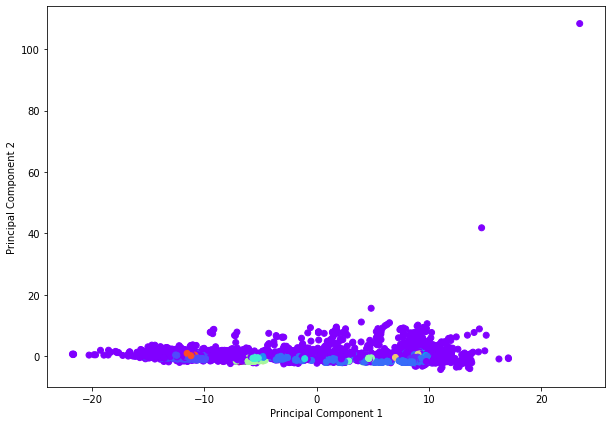

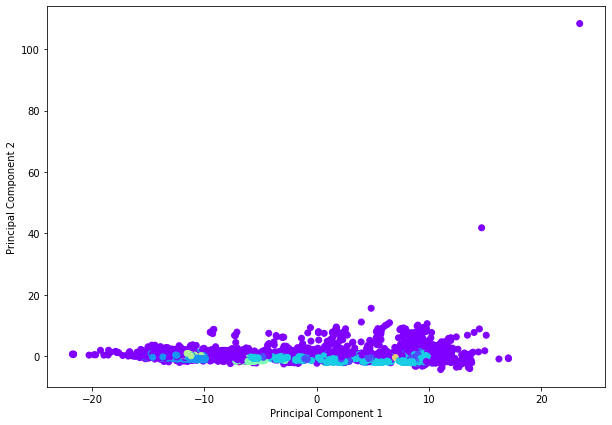

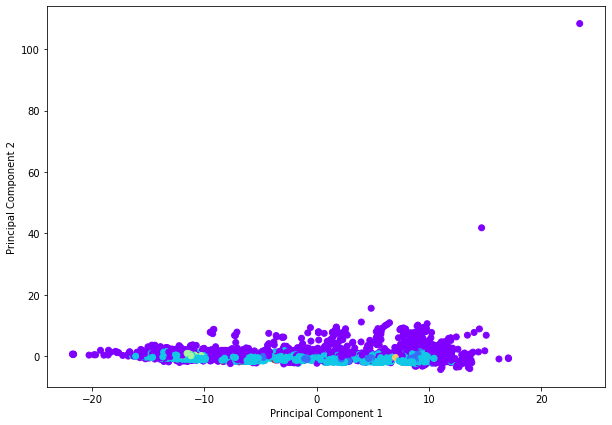

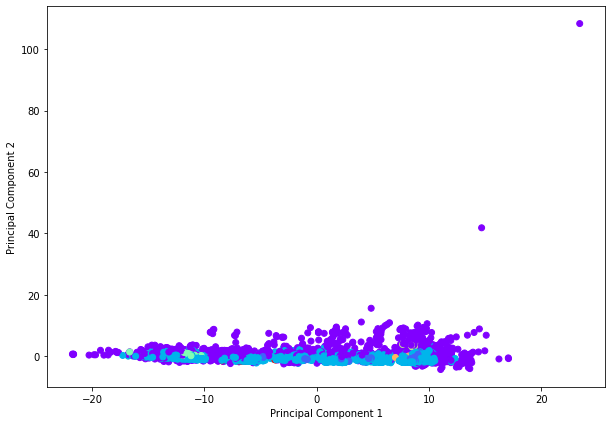

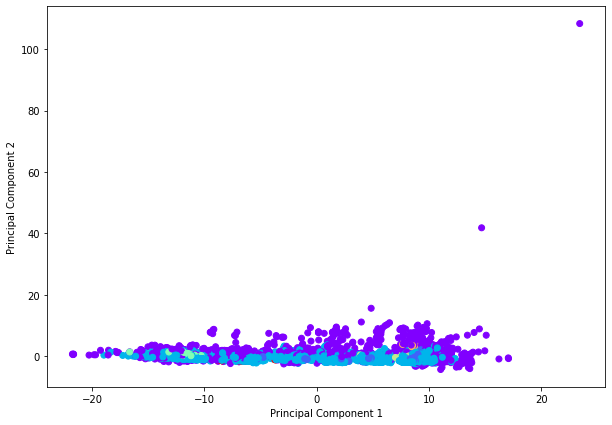

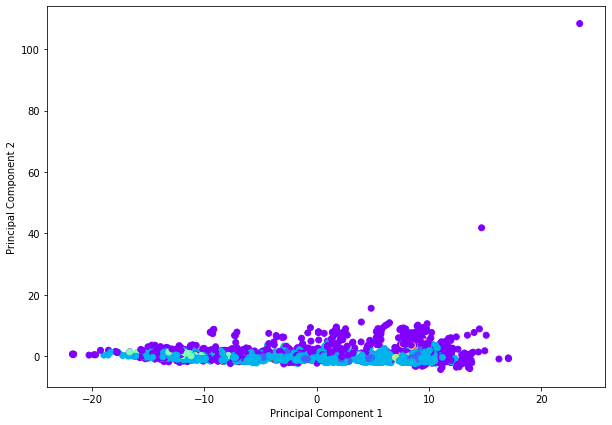

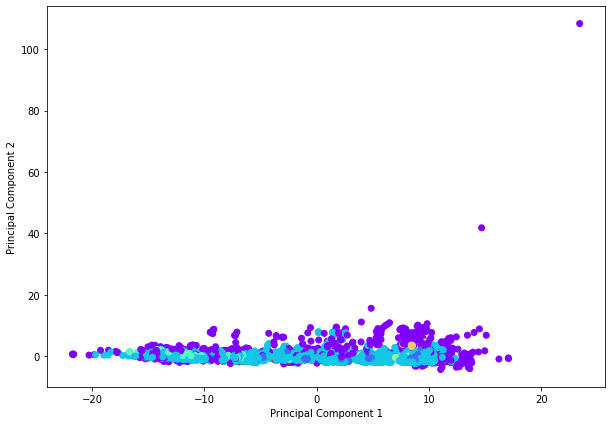

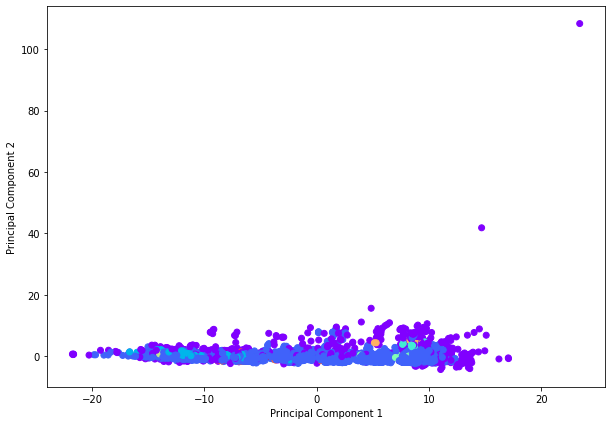

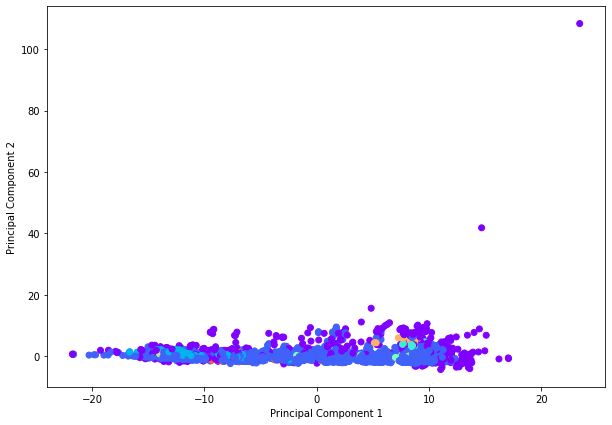

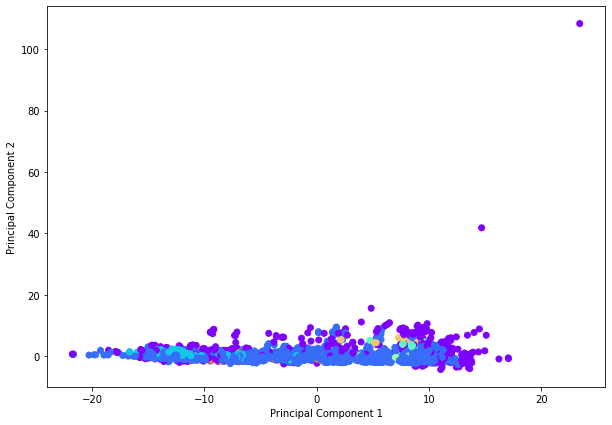

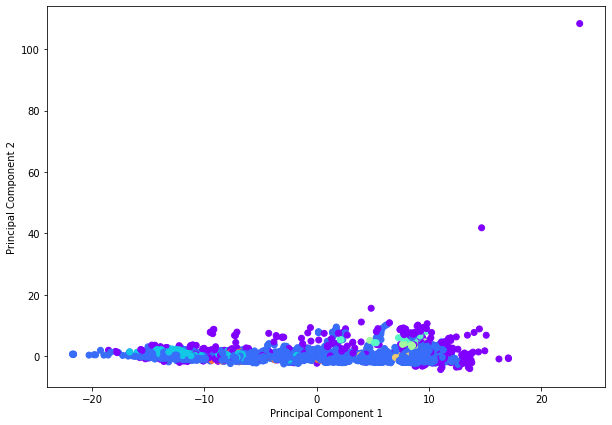

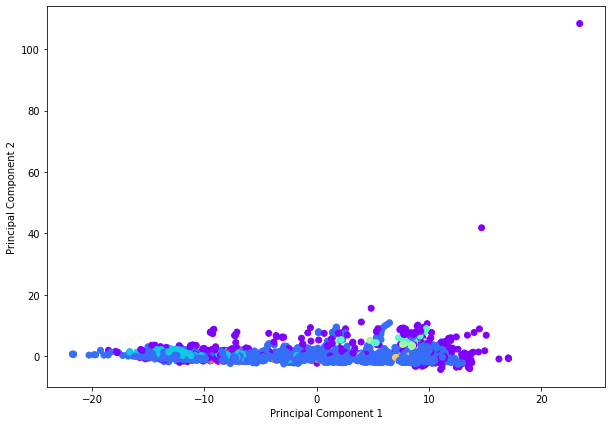

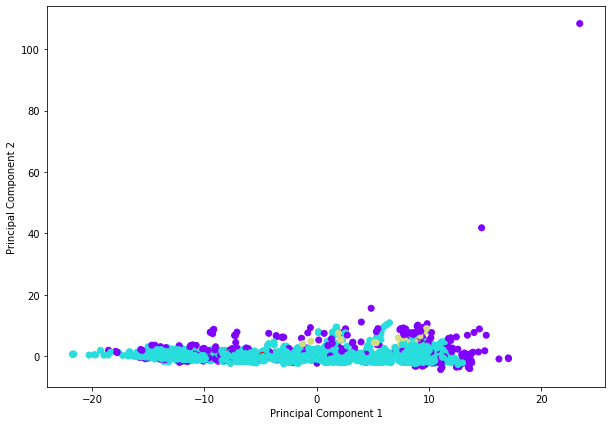

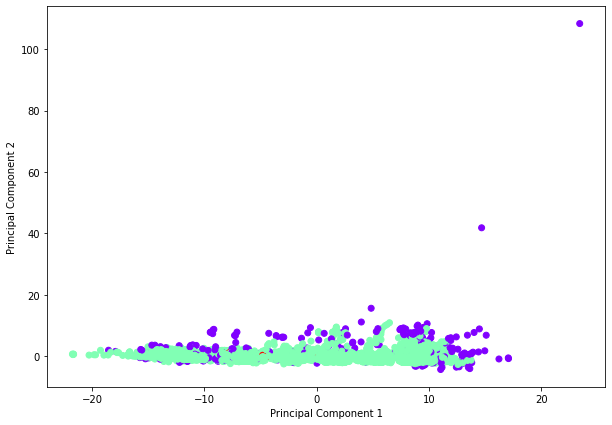

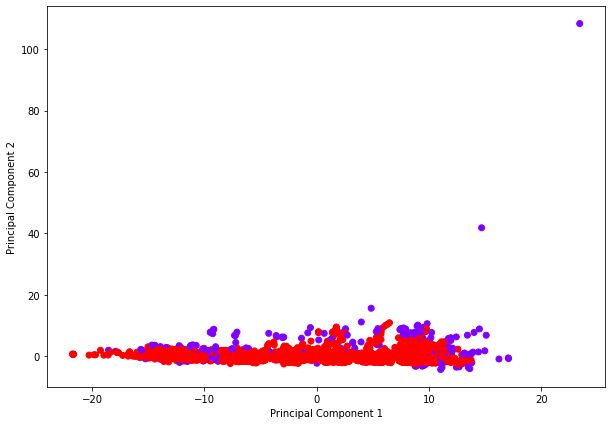

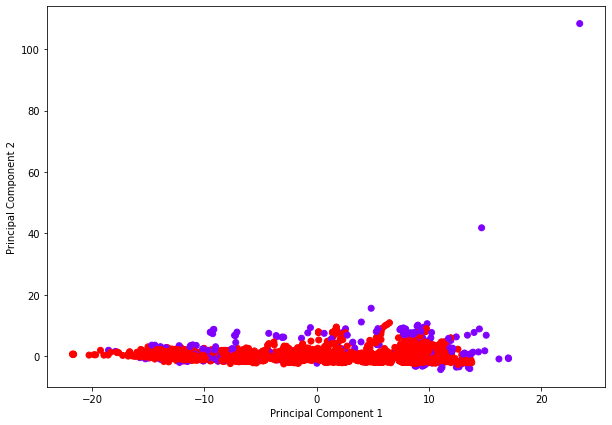

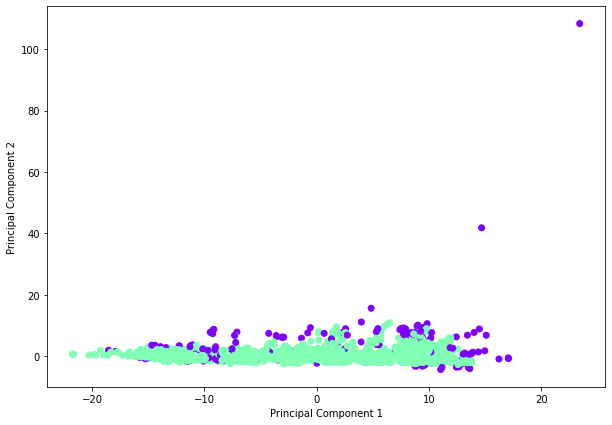

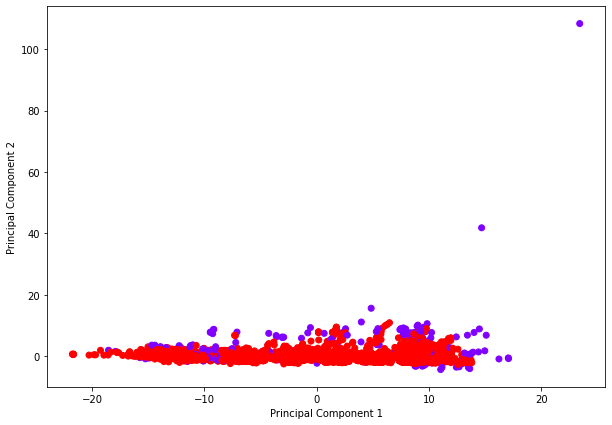

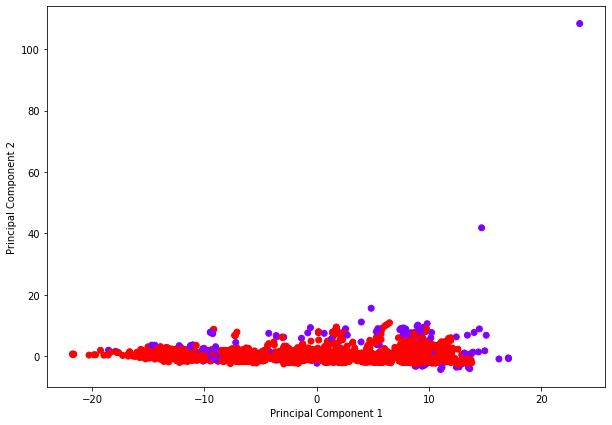

In [22]:
for eps in np.arange(2.5, 12, 0.5):
  db = DBSCAN(eps=eps, min_samples=30)
  db.fit_predict(X_pca_head)
  assigning_clusters = db.labels_
  plt.figure(figsize=(10, 7))  
  plt.scatter(X_pca_head['0'], X_pca_head['1'], c=db.labels_, cmap='rainbow') 
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  #print(assigning_clusters)
  print("Silhouette Score for eps = " + str(eps) + " " + str(silhouette_score(X_pca_head, assigning_clusters)))
  print("Davies Bouldin Score for eps = " + str(eps) + " " + str(davies_bouldin_score(X_pca_head, assigning_clusters))) 
  Silhouette.append(silhouette_score(X_pca_head, assigning_clusters))
  davies_bouldin.append(davies_bouldin_score(X_pca_head, assigning_clusters))

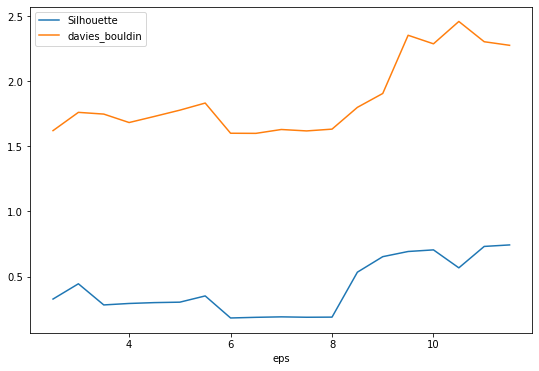

In [23]:
#create visaulization for silhouette and davies-bouldin scores
lst=[2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5]
t_list = [lst,Silhouette, davies_bouldin]
df = pd.DataFrame({'eps': lst, 'Silhouette': Silhouette, 'davies_bouldin': davies_bouldin})
df.plot(x="eps", y=["Silhouette", "davies_bouldin"], kind="line", figsize=(9, 6))

Based on the silhouette scores and Davies-Bouldin indices, the optimall eps is 8.5.

In [24]:
#Try DBSCAN clustering with epsilons of 8.5 and minimum samples as 30, plot, and generate scores
db = DBSCAN(eps=8.5, min_samples=30).fit(X_pca_head)
labels = db.labels_
print("Silhouette Score for eps = " + str(8.5) + " " + str(silhouette_score(X_pca_head, labels)))
print("Davies Bouldin Score for eps = " + str(8.5) + " " + str(davies_bouldin_score(X_pca_head, labels))) 

Silhouette Score for eps = 8.5 0.5338017036917884
Davies Bouldin Score for eps = 8.5 1.7988905961742474


In [25]:
# Number of clusters in labels and number of noise points.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 394


In [26]:
#add a column with DBSCAN clustering labels 
X_pca_head['DBSCAN_cluster']=labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#plot in a 3D scatter plot for 3 clusters
import plotly.express as px
fig = px.scatter_3d(X_pca_head, x='0', y='1', z='2', color='DBSCAN_cluster',                 
                    width=700,
                    height=700)                 
#fig.update_layout(showlegend=False)
fig.show()